# Importando e tratando a base de dados



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/matheuslevi11/Stellar-Classification/main/star_classification.csv")
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


Renomeando algumas colunas para facilitar o entendimento e filtrando as colunas indesejadas.

In [4]:
features = ['u', 'r', 'g', 'i', 'z', 'redshift', 'class']
df = df[features]
new_name = {'u': 'ultraviolet', 'r': 'red', 'g': 'green', 'i': 'near_infrared', 'z': 'infrared'}
df = df.rename(columns=new_name)

Verificando outliers

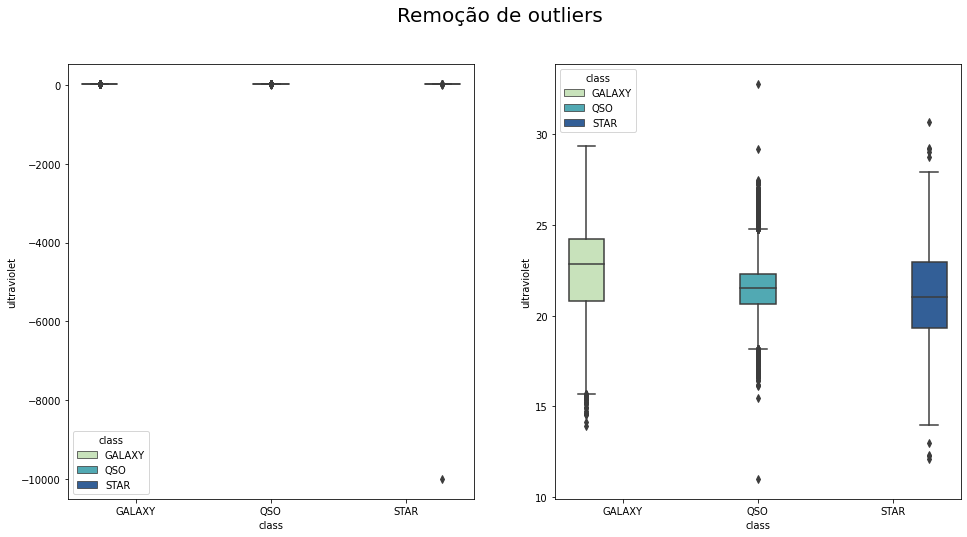

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Remoção de outliers', size=20, weight=30)
sns.boxplot(ax=axes[0], data=df, x='class', y=df['ultraviolet'], hue='class', palette="YlGnBu")
df = df.drop(79543)
sns.boxplot(ax=axes[1], data=df, x='class', y=df['ultraviolet'], hue='class', palette="YlGnBu")

# Análise Exploratória dos Dados

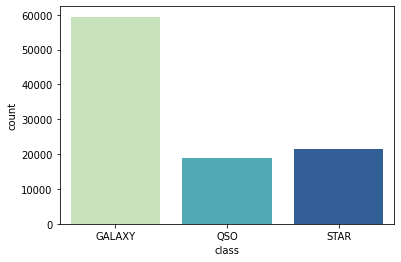

In [6]:
sns.countplot(x=df['class'], palette="YlGnBu")

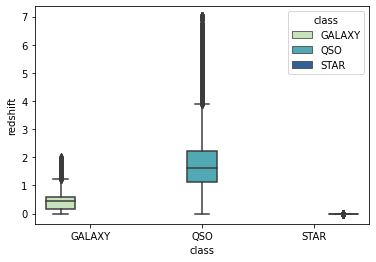

In [7]:
sns.boxplot(data=df, x='class', y='redshift', hue='class', palette="YlGnBu")

Text(0.5, 1.0, 'Infravermelho')

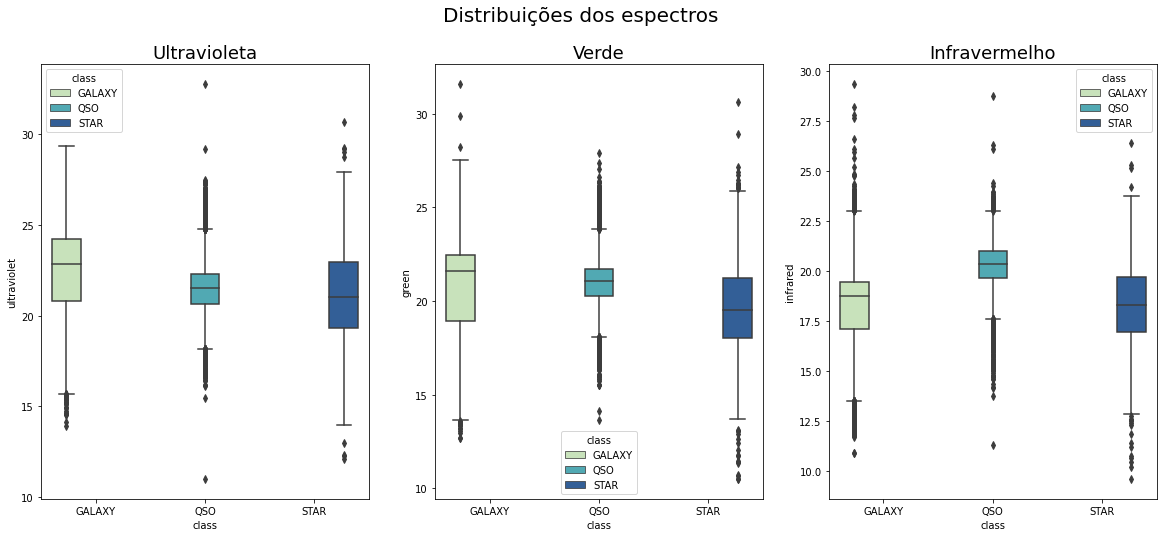

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(20,8))
fig.suptitle('Distribuições dos espectros', size=20, weight=30)
sns.boxplot(ax=axes[0], data=df, x='class', y=df['ultraviolet'], hue='class', palette="YlGnBu")
axes[0].set_title('Ultravioleta', size=18)
sns.boxplot(ax=axes[1], data=df, x='class', y=df['green'], hue='class', palette="YlGnBu")
axes[1].set_title('Verde', size=18)
sns.boxplot(ax=axes[2], data=df, x='class', y=df['infrared'], hue='class', palette="YlGnBu")
axes[2].set_title('Infravermelho', size=18)

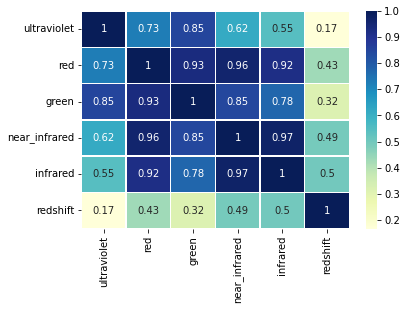

In [9]:
sns.heatmap(df.corr(), linewidth=0.5, cmap="YlGnBu", annot=True)

### Pré-processamento

In [10]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(df['class'])
df['class'] = le.transform(df['class'])
df['class'].value_counts()

0    59445
2    21593
1    18961
Name: class, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('class', axis=1)
y = df['class']

sm = SMOTE(random_state=11)
X, y = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Aplicação de métodos de aprendizagem de máquina

### Testando RandomForest

In [18]:
from sklearn.ensemble import RandomForestClassifier
for k in range(90,300, 40):
  model = RandomForestClassifier(n_estimators=k, random_state=11)
  model.fit(X_train, y_train)
  print(f" {k} Validation score:", model.score(X_test, y_test))

KeyboardInterrupt: ignored

Após a execução da célula acima, o número de árvores escolhidos foi 210.

### Testando DecisionTree

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=11)
model.fit(X_train, y_train)
print("Validation score:", model.score(X_test, y_test))

Validation score: 0.9695406423829176


In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(250,200))
_ = tree.plot_tree(model, 
                   feature_names=features,  
                   class_names={0:'galaxy', 1:'quasar', 2:'star'},
                   filled=True)

### Testando KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(3,10):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  print(f" {k} Validation score:", model.score(X_test, y_test))

Após a execução da célula acima, a quantidade de vizinhos escolhida foi 3.

### Testando XGBoost

In [16]:
from xgboost import XGBClassifier
for d in range(15,20):
  model = XGBClassifier(max_depth=d, random_state=11)
  model.fit(X_train, y_train)
  print(f"{d} Validation score:", model.score(X_test, y_test))

15 Validation score: 0.9814731742329087
16 Validation score: 0.9816077516597883
17 Validation score: 0.9815628925174951
18 Validation score: 0.9818320473712543
19 Validation score: 0.9815628925174951


Após a execução da célula acima, a profundidade máxima escolhida foi 18

### Rinha de Modelos

É feita a seleção dos modelos

In [21]:
models = {
    "KNN":{"model": KNeighborsClassifier(n_neighbors=3) },
    "XGBoost":{"model": XGBClassifier(max_depth=18, random_state=11) },
    "RandomForest":{"model": RandomForestClassifier(n_estimators=210, random_state=11) },
    "DecisionTree":{"model":DecisionTreeClassifier(random_state=11)}
}

Comparação de modelos via k-fold CV

In [23]:
from sklearn.model_selection import cross_validate

k = 5
results = []
for name, m in models.items():
    model = m['model']
    result = cross_validate(model, X_train, y_train, cv = k)
    
    result['test_score'] = result['test_score']
    mean = sum(result['test_score']) / len(result['test_score'])
    print(f"{name}'s {k}-fold CV: {mean}")
    results.append([name, mean])

KNN's 5-fold CV: 0.9650843768265105
XGBoost's 5-fold CV: 0.9810543573705166
RandomForest's 5-fold CV: 0.9805085643754431
DecisionTree's 5-fold CV: 0.9688750055985331


In [25]:
df_results = pd.DataFrame(results, 
                          columns = ['Modelo','Desempenho'])
df_results.sort_values(by='Desempenho', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

,Modelo,Desempenho
0,XGBoost,0.981054
1,RandomForest,0.980509
2,DecisionTree,0.968875
3,KNN,0.965084


In [26]:
model = XGBClassifier(max_depth=d, random_state=11)
model.fit(X_train, y_train)

XGBClassifier(max_depth=19, objective='multi:softprob', random_state=11)

### Avaliando o modelo final

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


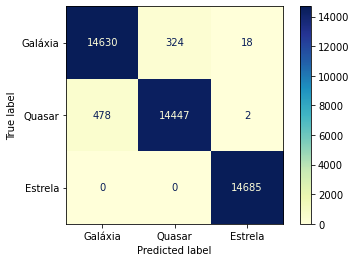

In [31]:
from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(model, X_test, y_test, cmap="YlGnBu", display_labels=['Galáxia', 'Quasar', 'Estrela'])

In [32]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     14972
           1       0.98      0.97      0.97     14927
           2       1.00      1.00      1.00     14685

    accuracy                           0.98     44584
   macro avg       0.98      0.98      0.98     44584
weighted avg       0.98      0.98      0.98     44584

